In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV


import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv("/Users/geraldocangondo/Desktop/Data_Analise/Data_Science_Udemy/One_Weak_Course/One_Weak_Models Optimization/used_car_price.csv")

In [3]:
dados.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,3.5,6,225,18,24,3880,115,197


In [4]:
dados.shape

(428, 14)

In [5]:
dados.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,3.196729,5.799065,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,1.108595,1.559679,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    int64  
 6   EngineSize   428 non-null    float64
 7   Cylinders    428 non-null    int64  
 8   Horsepower   428 non-null    int64  
 9   MPG_City     428 non-null    int64  
 10  MPG_Highway  428 non-null    int64  
 11  Weight       428 non-null    int64  
 12  Wheelbase    428 non-null    int64  
 13  Length       428 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 46.9+ KB


<Axes: >

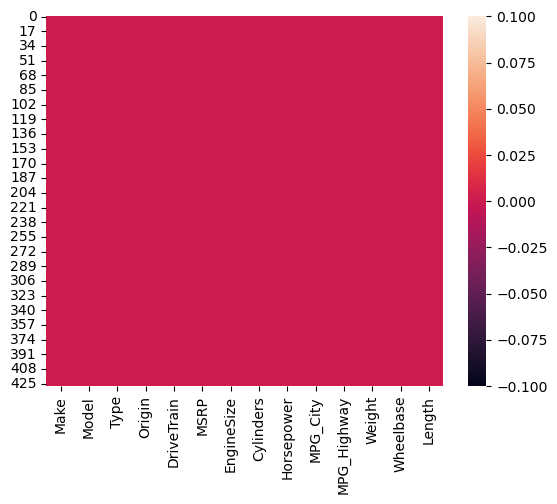

In [7]:
sns.heatmap(dados.isnull())

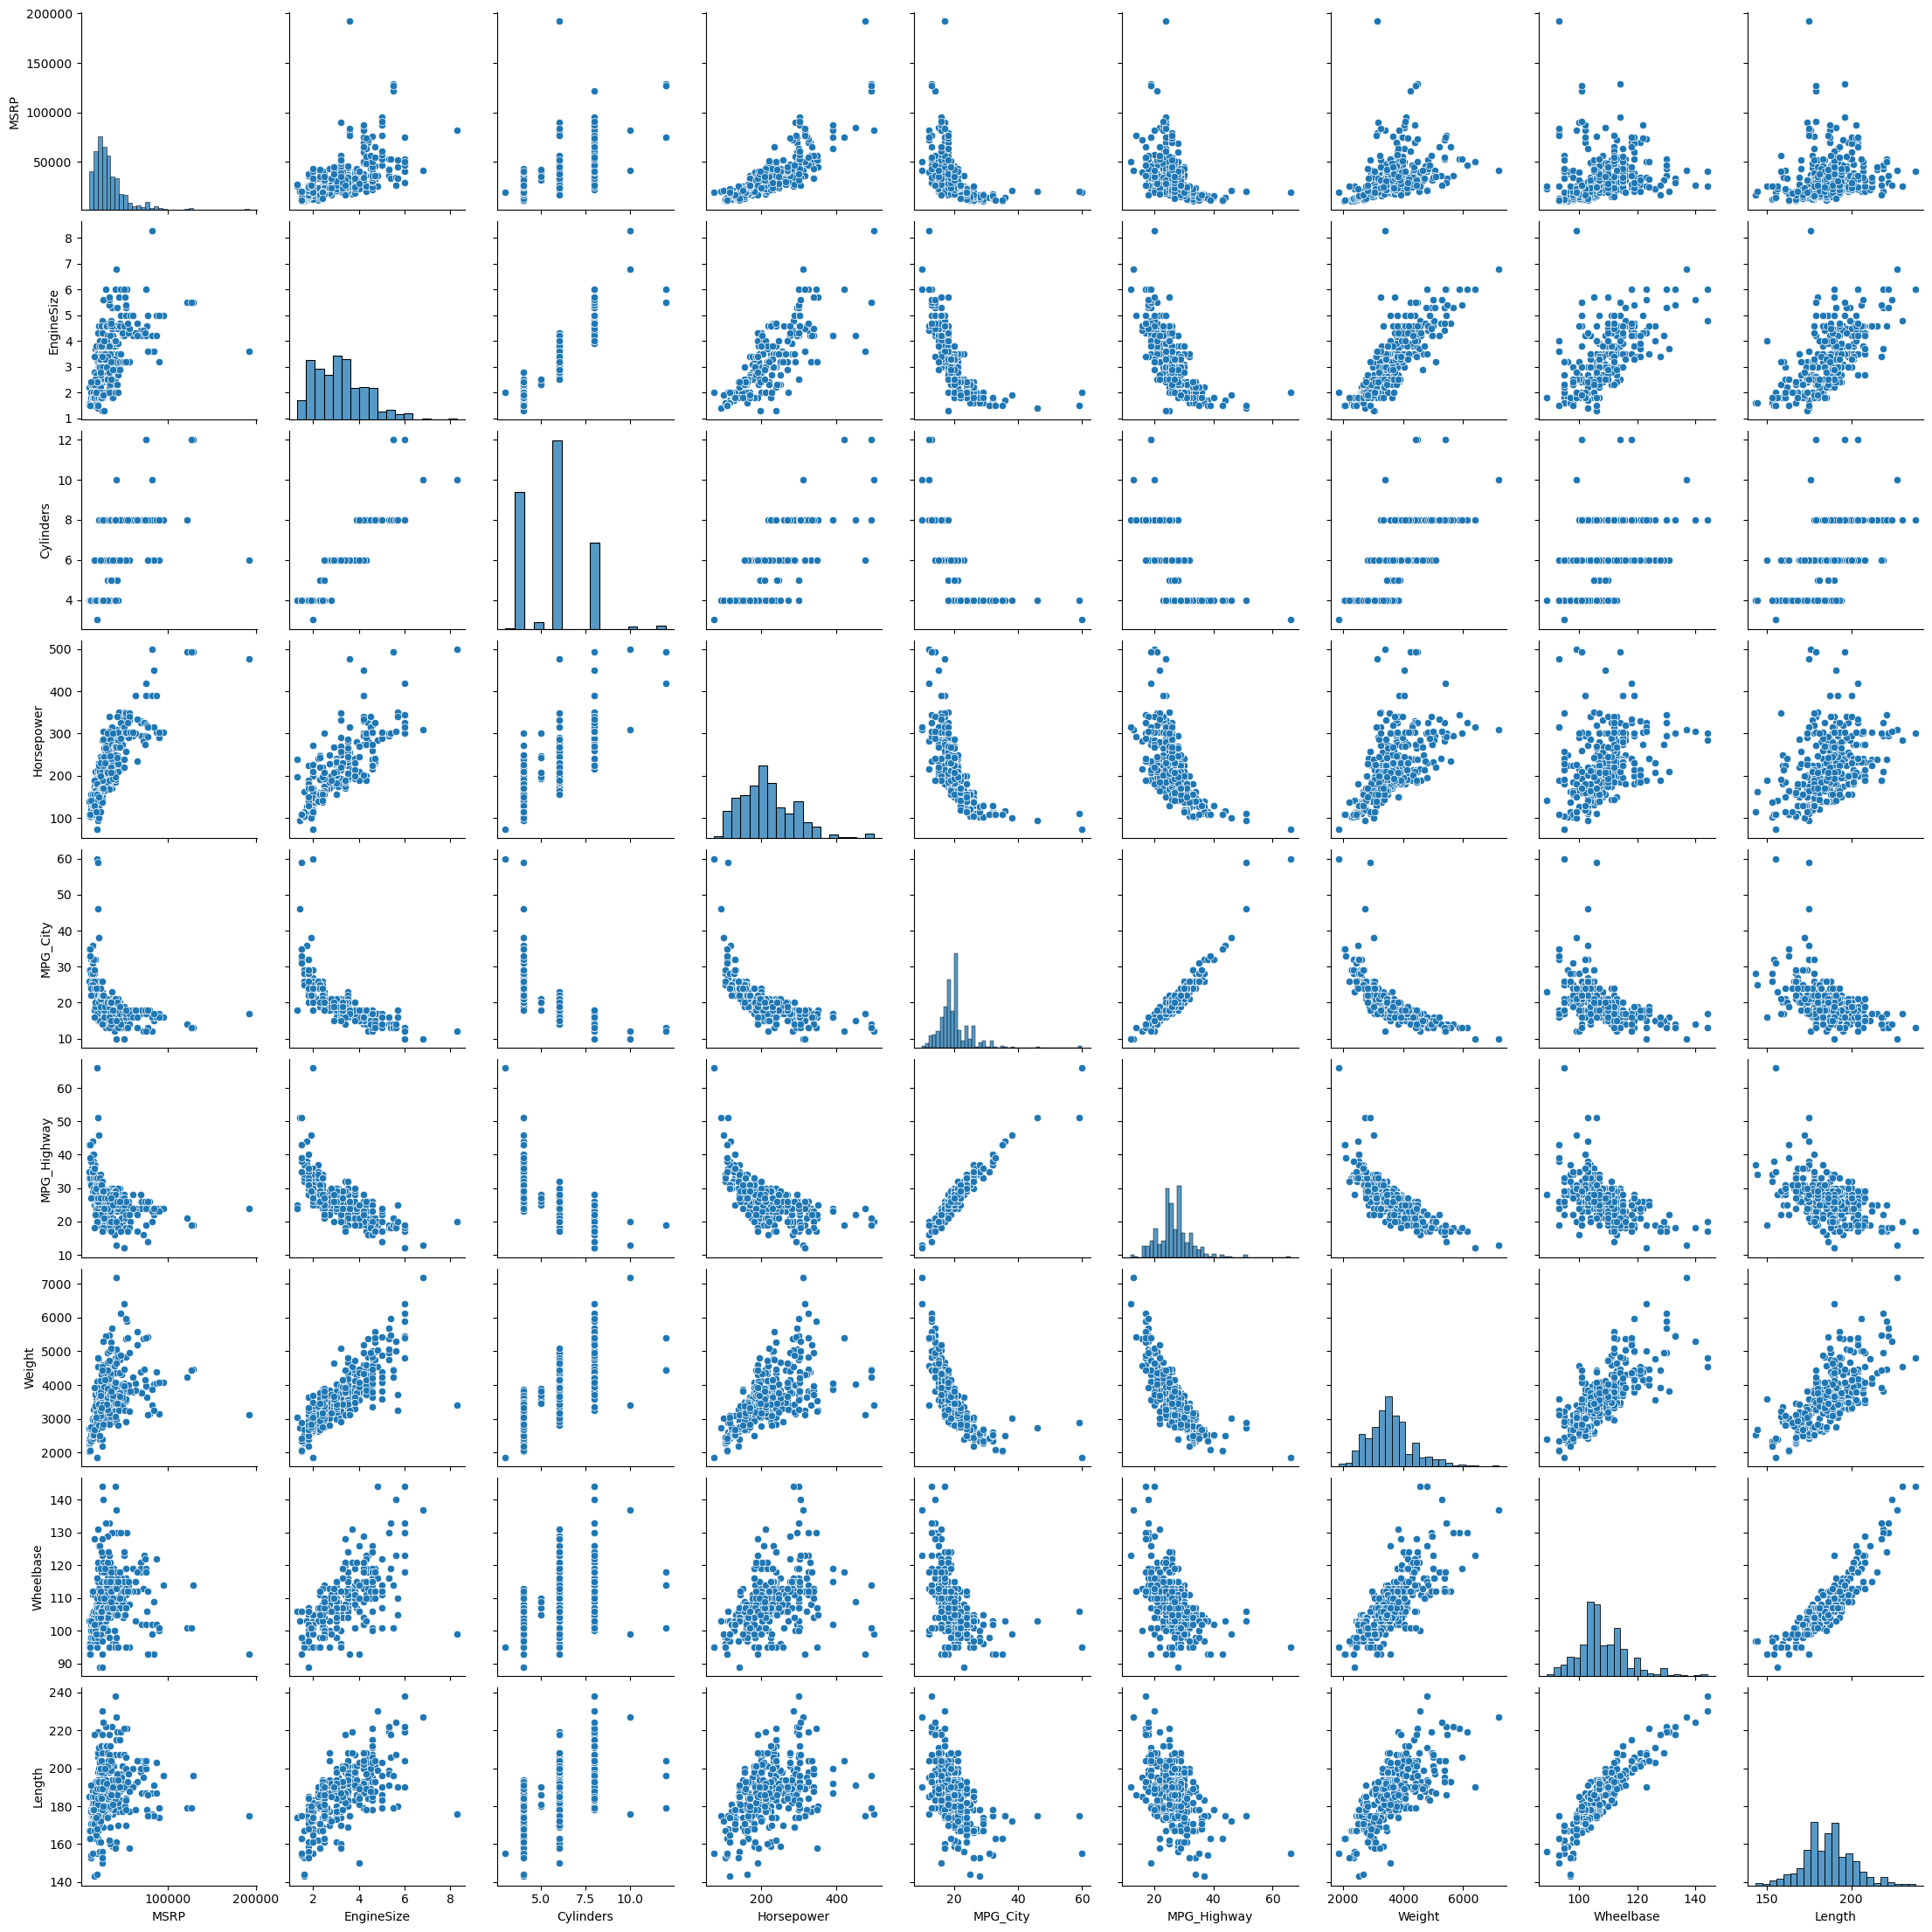

In [8]:
sns.pairplot(dados);

1) - Execução da codificação One-Hot para as variaveis "Make", "Model", "Type", "Origin", "DriveTrain"

In [9]:
dados.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [10]:
dados = pd.get_dummies(dados, columns = ["Make", "Model", "Type", "Origin", "DriveTrain"])

2) - Alimentando recursos de entrada para X e saída (MSRP) para y

In [11]:
X = dados.drop("MSRP", axis = 1)
y = dados['MSRP']

In [12]:
X = np.array(X)
y = np.array(y)

3) - Divisão dos dados em Treino e Testes

In [13]:
x_treino, x_testes, y_treino, y_testes = train_test_split(X, y, test_size = 0.25)

In [14]:
x_treino.shape

(321, 483)

In [15]:
x_testes.shape

(107, 483)

4) - Aplicação do Algoritmo XG-BOOST sem a Optimização

In [16]:
modelo = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 1, max_depth = 3, n_estimators = 500)
modelo.fit(x_treino, y_treino)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
#previsão da pontuação do modelo treinado usando o conjunto de dados de teste
resultado = modelo.score(x_testes, y_testes)

In [18]:
#previsões sobre os dados de teste
y_predict = modelo.predict(x_testes)

In [19]:
#Observação a métrica 

RMSE = float(format(np.sqrt(mean_squared_error(y_testes, y_predict)),'.3f'))
r2 = r2_score(y_testes, y_predict)

print('RMSE =',RMSE,'\nR2 =', r2) 

RMSE = 8800.31 
R2 = 0.7742282748222351


5) - Aplicação do Algoritmo XG-BOOST com optmização por meio do GRIDSEARCH

In [20]:
parameters_grid = { 'max_depth': [3, 10, 20], 
                   'learning_rate': [0.1, 0.5],
                   'n_estimators': [100, 500],
                   'colsample_bytree': [0.3, 0.7]}

In [21]:
modelo = xgb.XGBRegressor(objective ='reg:squarederror')

In [22]:
# O "neg_mean_squared_error" é usado porque o  GridSearchCV() classifica todos os algoritmos (estimadores)
# e especifica qual é o melhor. 
# Está prática tenta minimizar o erro.

xgb_gridsearch = GridSearchCV(estimator = modelo, 
                              param_grid = parameters_grid, 
                              scoring = 'neg_mean_squared_error',  
                              cv = 5, 
                              verbose = 5)

In [23]:
xgb_gridsearch.fit(x_treino, y_treino)
y_predict = xgb_gridsearch.predict(x_testes)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=-307931254.503 total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=-37205933.411 total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=-42318897.845 total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=-37403540.983 total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=-39929857.511 total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-296728728.728 total time=   0.2s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=-30971295.855 total time=   0.3s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.1, max_dep

In [24]:
#Observação da métrica depois da Optmização do modelo. 
RMSE = float(format(np.sqrt(mean_squared_error(y_testes, y_predict)),'.3f'))
r2 = r2_score(y_testes, y_predict)

print('RMSE =',RMSE,'\nR2 =', r2) 

RMSE = 5062.828 
R2 = 0.9252760410308838


6) - Aplicação do Algoritmo XG-BOOST com optmização por meio do RANDOM SEARCH

In [25]:
# Defina a grade de hiperparâmetros para pesquisar
# você pode escolher qual booster você gostaria de escolher:
# Duas opções estão disponíveis: gbtree, gblinear
# gbtree usa modelos baseados em árvore enquanto gblinear usa funções lineares

grid = {
    'n_estimators': [100, 500],
    'max_depth': [3, 10, 20],
    'learning_rate': [0.1, 0.5], 
    'colsample_bytree': [0.3, 0.7]}

In [26]:
modelo = xgb.XGBRegressor(objective ='reg:squarederror')

In [27]:
# Configuração da pesquisa aleatória
random_cv = RandomizedSearchCV(estimator = modelo,
                               param_distributions = grid,
                               cv = 5, 
                               n_iter = 100,
                               scoring = 'neg_mean_absolute_error',
                               verbose = 5, 
                               return_train_score = True)

In [28]:
random_cv.fit(x_treino, y_treino)
random_cv.best_estimator_
y_predict = random_cv.predict(x_testes)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=(train=-2329.879, test=-7008.880) total time=   0.1s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=(train=-2553.899, test=-4067.923) total time=   0.1s
[CV 3/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=(train=-2586.761, test=-4633.712) total time=   0.1s
[CV 4/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=(train=-2519.969, test=-4065.231) total time=   0.1s
[CV 5/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=100;, score=(train=-2534.986, test=-4809.831) total time=   0.1s
[CV 1/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n_estimators=500;, score=(train=-1057.745, test=-6590.361) total time=   0.3s
[CV 2/5] END colsample_bytree=0.3, learning_rate=0.1, max_depth=3, n

In [29]:
#Observação da métrica depois da Optmização do modelo. 
RMSE = float(format(np.sqrt(mean_squared_error(y_testes, y_predict)),'.3f'))
r2 = r2_score(y_testes, y_predict)

print('RMSE =',RMSE,'\nR2 =', r2) 

RMSE = 5062.828 
R2 = 0.9252760410308838


7) - Aplicação do Algoritmo XG-BOOST com optmização por meio do BAYESIAN

In [30]:
modelo = xgb.XGBRegressor(objective ='reg:squarederror')

In [31]:
search_space = {
        "max_depth": (4, 20, 'log-uniform'),
        "n_estimators": (2, 100, 'log-uniform'),
        'learning_rate': (0.01, 1.0, 'log-uniform')}

In [32]:
xgb_bayes_search = BayesSearchCV(modelo, 
                                    search_space, 
                                    n_iter = 100, 
                                    scoring = 'neg_mean_absolute_error', 
                                    cv = 5)

In [33]:
resultado = xgb_bayes_search.fit(x_treino, y_treino)

In [34]:
y_predict = xgb_bayes_search.predict(x_testes)

In [35]:
#Observação da métrica depois da Optmização do modelo. 

RMSE = float(format(np.sqrt(mean_squared_error(y_testes, y_predict)),'.3f'))
r2 = r2_score(y_testes, y_predict)

print('RMSE =',RMSE,'\nR2 =', r2) 

RMSE = 5961.949 
R2 = 0.8963784575462341
